In [1]:
import pandas as pd

from src.utils import read_data

fi = read_data("feas_iti")
fi.info()

[INFO] read_data(('feas_iti',), {}) executing at 04-05 15:53:34.
[INFO] read_data(('feas_iti',), {}) executed in  04-05 15:53:35. (04-05 15:53:34 -> 0.6647s )
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112398082 entries, 0 to 112398081
Data columns (total 7 columns):
 #   Column     Dtype
---  ------     -----
 0   rid        int32
 1   iti_id     int32
 2   path_id    int32
 3   seg_id     int32
 4   train_id   int32
 5   board_ts   int32
 6   alight_ts  int32
dtypes: int32(7)
memory usage: 2.9 GB


In [20]:
import pandas as pd
for col in fi.columns:
    print(col, fi[col].nunique())

rid 1970821
iti_id 446796
path_id 60447
seg_id 5
train_id 2217
board_ts 37474
alight_ts 37612


In [2]:
fi['seg_id'] = fi['seg_id'].astype("int8")
fi['train_id'] = fi['train_id'].astype("category")
fi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112398082 entries, 0 to 112398081
Data columns (total 7 columns):
 #   Column     Dtype   
---  ------     -----   
 0   rid        int32   
 1   iti_id     int32   
 2   path_id    int32   
 3   seg_id     int8    
 4   train_id   category
 5   board_ts   int32   
 6   alight_ts  int32   
dtypes: category(1), int32(5), int8(1)
memory usage: 2.4 GB


In [28]:
print(fi.rid.nunique())  # number of rid that found feas iti
print(fi[fi['iti_id'] == 101].rid.size)  # number of rid that has more than 100 feas iti

1970821
85637


In [5]:
df_feas_cnt = fi.drop_duplicates(["rid"], keep="last")
df_feas_cnt[df_feas_cnt['iti_id'] > 100].shape

(26385, 7)

<Axes: >

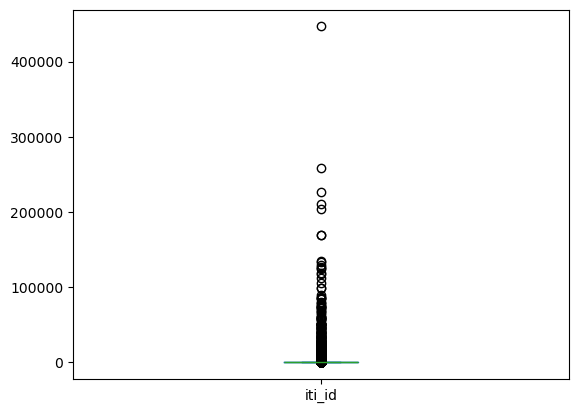

In [10]:
df_feas_cnt['iti_id'].plot.box()